# LOGISTIC REGRESSION
1. Data Exploration:
a. Load the dataset and perform exploratory data analysis (EDA).
b. Examine the features, their types, and summary statistics.
c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
2. Data Preprocessing:
a. Handle missing values (e.g., imputation).
b. Encode categorical variables.
3. Model Building:
a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
b. Train the model using the training data.
4. Model Evaluation:
a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.
5. Interpretation:
a. Interpret the coefficients of the logistic regression model.
b. Discuss the significance of features in predicting the target variable (survival probability in this case).
6. Deployment with Streamlit:
In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



# 1. Data Exploration:

# a. Load the dataset and perform exploratory data analysis (EDA).

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
#in this assignment we are having two datasets train and test

dftrain=pd.read_csv("Titanic_train.csv")
dftest=pd.read_csv("Titanic_test.csv")

dftrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#1.understanding the data
#checking shape of the data

dftrain.shape,dftest.shape   #here we are having same 891 as train and 418 test

((891, 12), (418, 11))

In [4]:
#checking the columns names

dftrain.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# i am merging the training and testing data to perform the EDA process 
#after that we will fit the model on train and test

df=pd.concat([dftrain,dftest],axis=0)  #merging with rows
df.reset_index(drop=True,inplace=True)   #reseting the index
df

#we can see the survived column for test is not given so we can find the
#null values in that column simply we ignore them

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
df.shape  #checking the shape of data


(1309, 12)

In [7]:
#checking the Data types of each columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


# b. Examine the features, their types, and summary statistics.

In [8]:
#these are the only columns which are having numeric values
df.select_dtypes(include=[int,float])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,NaN,0,0,8.0500
1305,1306,NaN,1,39.0,0,0,108.9000
1306,1307,NaN,3,38.5,0,0,7.2500
1307,1308,NaN,3,NaN,0,0,8.0500


In [9]:
df['Pclass'].unique() #tho it is numbers but behaving as descrete having 
                      #3 values like label encoding

array([3, 1, 2], dtype=int64)

In [10]:
df['SibSp'].unique()  #same numeric but descrete because it say no of 
                      #siblings/spouses aboard at titinic

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [11]:
df['Parch'].unique()#same situation number of parents/childrens aboard ship

array([0, 1, 2, 5, 3, 4, 6, 9], dtype=int64)

In [12]:
#3==>statistical summary 

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


# c.Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.

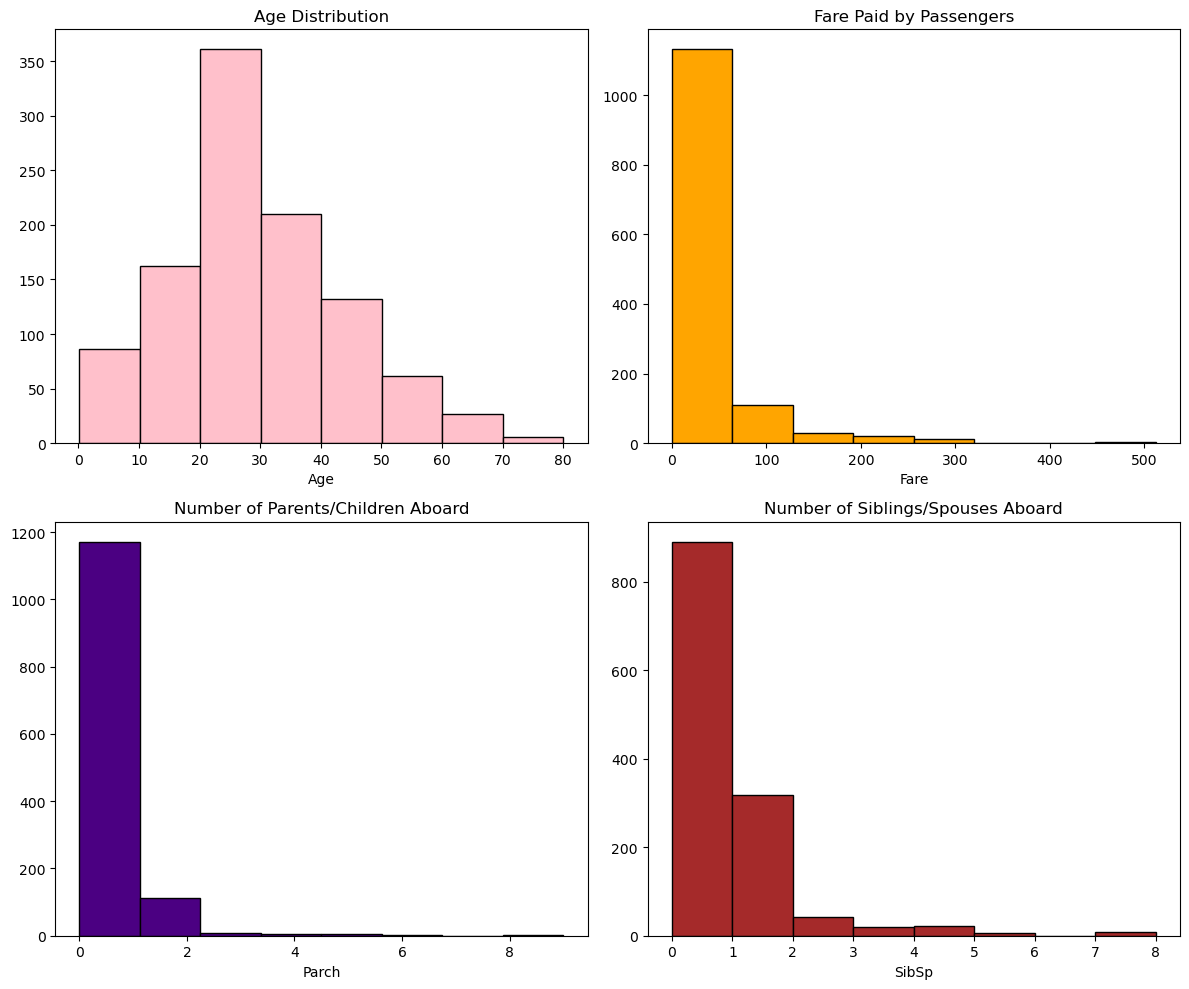


Skewness of Age: 0.40767455974362266
Skewness of Fare: 4.367709134122922
Skewness of Parch: 3.6690782036511136
Skewness of SibSp: 3.844220342922907


In [13]:
 import warnings
warnings.filterwarnings('ignore')   #ignoring alll the warnings

# Creating the dashboard layout
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid layout

# Histogram for Age
axes[0, 0].hist(df['Age'], bins=8, color='pink', edgecolor='black')
axes[0, 0].set_title("Age Distribution")
axes[0, 0].set_xlabel("Age")

# Histogram for Fare
axes[0, 1].hist(df['Fare'], bins=8, color='orange', edgecolor='black')
axes[0, 1].set_title("Fare Paid by Passengers")
axes[0, 1].set_xlabel("Fare")

# Histogram for Parch
axes[1, 0].hist(df['Parch'], bins=8, color='indigo', edgecolor='black')
axes[1, 0].set_title("Number of Parents/Children Aboard")
axes[1, 0].set_xlabel("Parch")

# Histogram for SibSp
axes[1, 1].hist(df['SibSp'], bins=8, color='brown', edgecolor='black')
axes[1, 1].set_title("Number of Siblings/Spouses Aboard")
axes[1, 1].set_xlabel("SibSp")

# Adjust layout
plt.tight_layout()
plt.show()

# Print skewness values
print("\nSkewness of Age:", df["Age"].skew())
print("Skewness of Fare:", df["Fare"].skew())
print("Skewness of Parch:", df["Parch"].skew())
print("Skewness of SibSp:", df["SibSp"].skew())

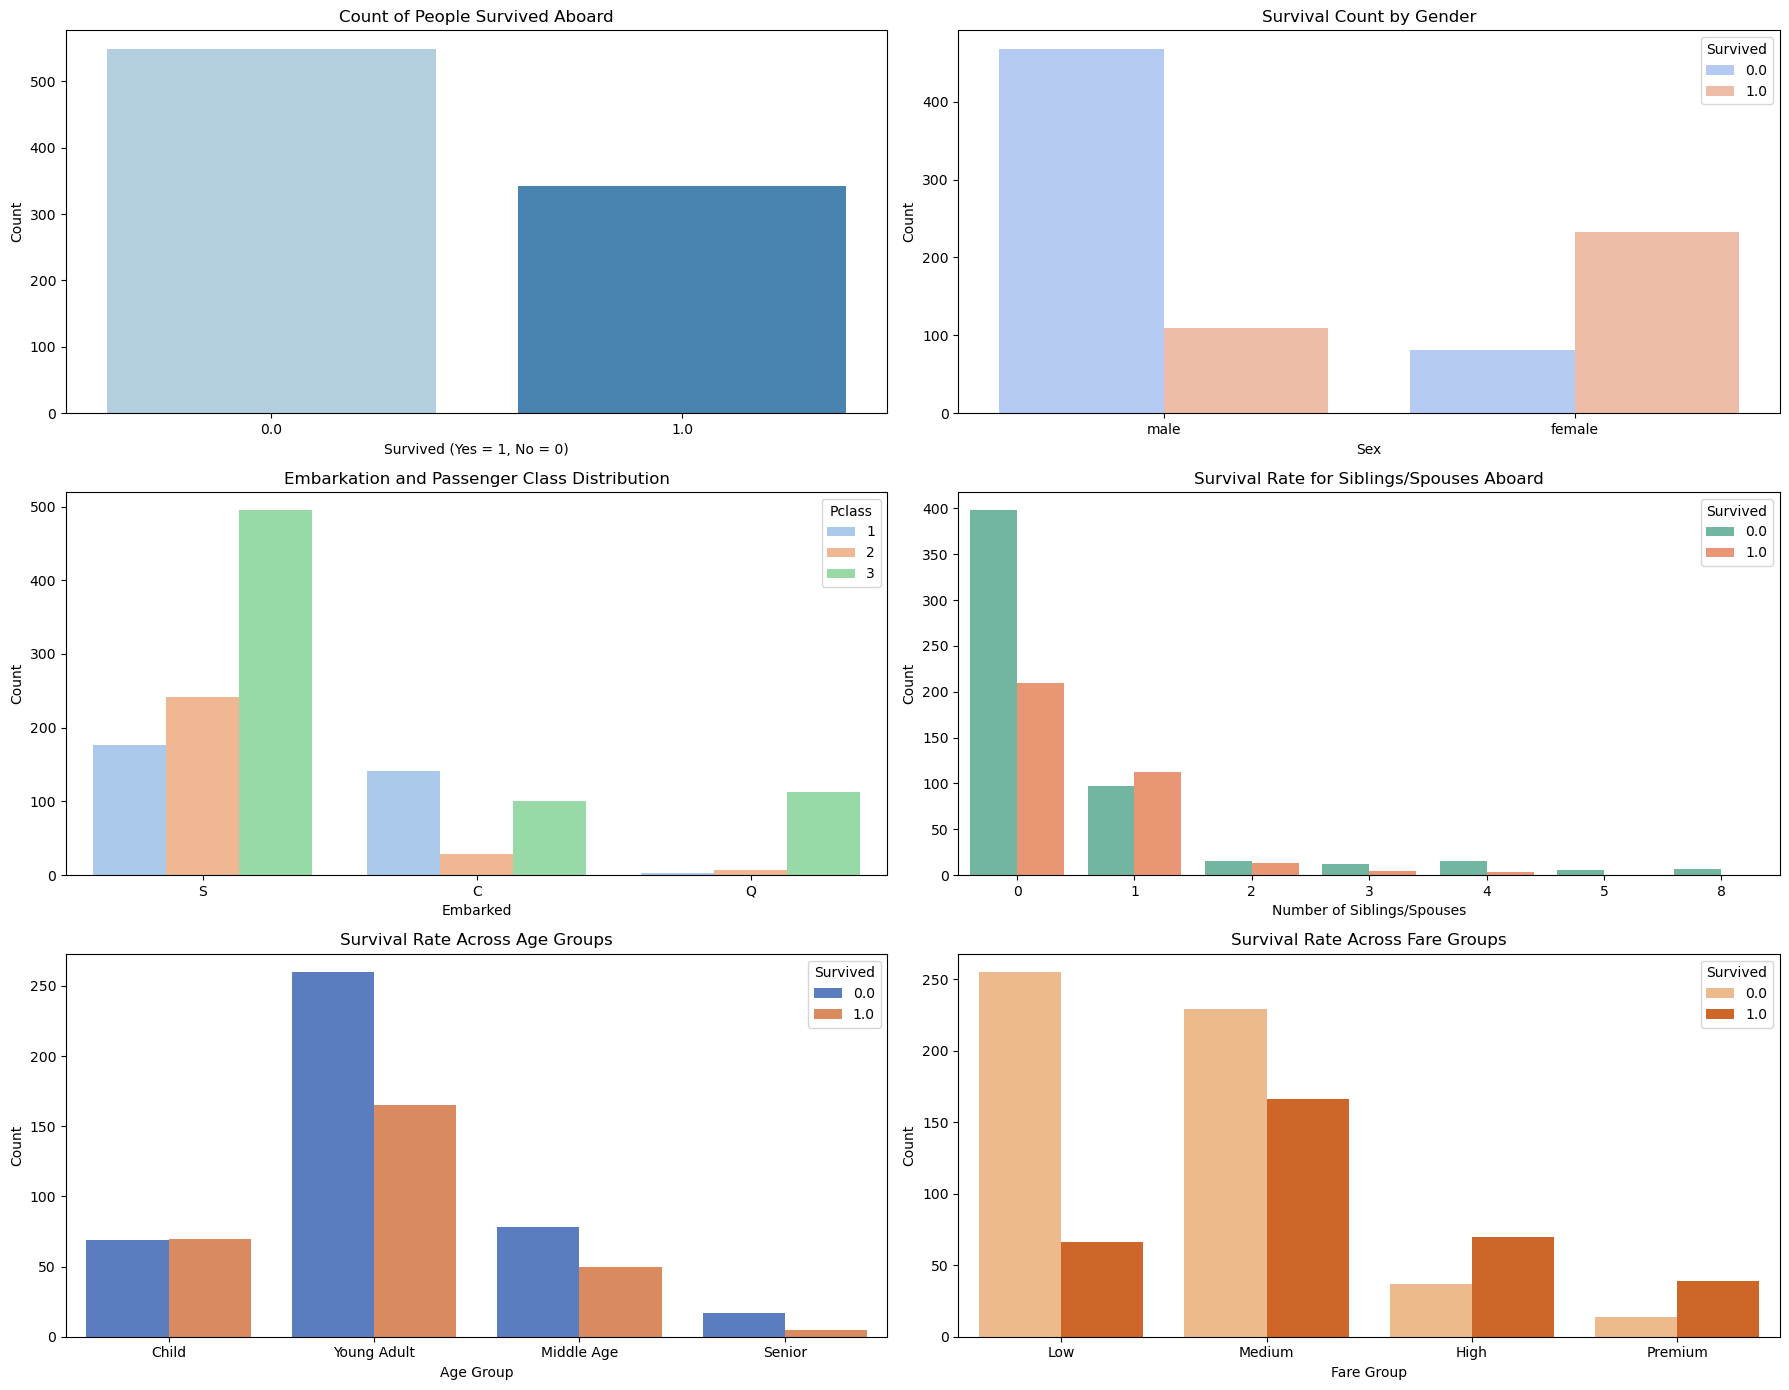


Skewness of SibSp: 3.844220342922907
Skewness of Pclass: -0.5986471102804279
Skewness of Fare: 4.367709134122922


In [14]:

# Creating a dashboard layout (3x2)
fig, axes = plt.subplots(3, 2, figsize=(18, 14))

#Survival Count
sns.barplot(x=df['Survived'].value_counts().index, y=df['Survived'].value_counts().values, ax=axes[0, 0], palette='Blues')
axes[0, 0].set_title("Count of People Survived Aboard")
axes[0, 0].set_xlabel("Survived (Yes = 1, No = 0)")
axes[0, 0].set_ylabel("Count")

# Gender-based Survival
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0, 1], palette='coolwarm')  #palette means color combinations
axes[0, 1].set_title("Survival Count by Gender")
axes[0, 1].set_xlabel("Sex")
axes[0, 1].set_ylabel("Count")

# Embarkation Distribution
sns.countplot(x='Embarked', hue='Pclass', data=df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title("Embarkation and Passenger Class Distribution")
axes[1, 0].set_xlabel("Embarked")
axes[1, 0].set_ylabel("Count")

# Sibling/Spouse Survival Analysis
sns.countplot(x='SibSp', hue='Survived', data=df, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title("Survival Rate for Siblings/Spouses Aboard")
axes[1, 1].set_xlabel("Number of Siblings/Spouses")
axes[1, 1].set_ylabel("Count")

#this plot split countinuous numeric data into descrete bins
# Age Group Comparison for Survival (Binned into Categories)
                                          #ages in intervals      #creates a new column
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 40, 60, 80], labels=['Child', 'Young Adult', 'Middle Age', 'Senior'])
sns.countplot(x='Age_Group', hue='Survived', data=df, ax=axes[2, 0], palette='muted')
axes[2, 0].set_title("Survival Rate Across Age Groups")
axes[2, 0].set_xlabel("Age Group")
axes[2, 0].set_ylabel("Count")

# Fare Category Analysis (Binned for Better Comparison)
                                            #fare categories
df['Fare_Group'] = pd.cut(df['Fare'], bins=[0, 10, 50, 100, 600], labels=['Low', 'Medium', 'High', 'Premium'])
sns.countplot(x='Fare_Group', hue='Survived', data=df, ax=axes[2, 1], palette='Oranges')
axes[2, 1].set_title("Survival Rate Across Fare Groups")
axes[2, 1].set_xlabel("Fare Group")
axes[2, 1].set_ylabel("Count")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Print Skewness values
print("\nSkewness of SibSp:", df["SibSp"].skew())  # Right skewed
print("Skewness of Pclass:", df["Pclass"].skew())  # Right skewed
print("Skewness of Fare:", df["Fare"].skew())  # Right skewed

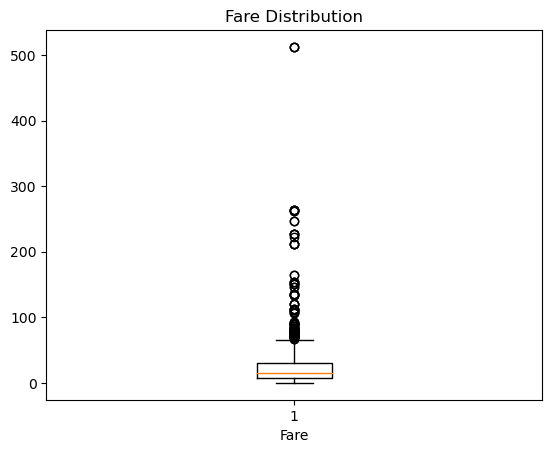

In [15]:
import matplotlib.pyplot as plt

# Boxplot for Fare

plt.boxplot(dftrain['Fare'])
plt.xlabel("Fare")
plt.title("Fare Distribution")
plt.show()

#from the box plot of fare column we can assume that some of them has payed 
#more maybe because of late ticket booking or some tickets for luxey cabins

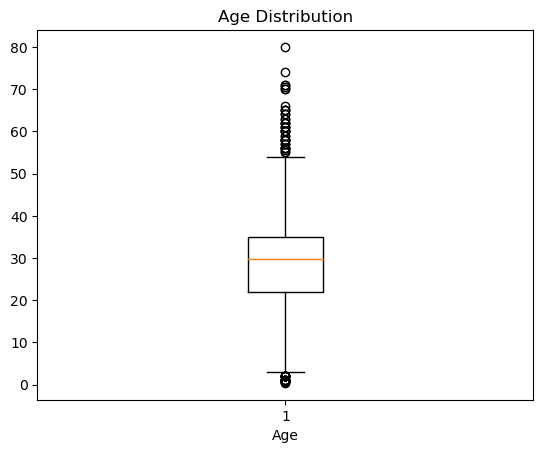

In [86]:
# Boxplot for Age
plt.boxplot(dftrain['Age'])
plt.xlabel('Age')
plt.title("Age Distribution")
plt.show()

#in the age column the outlaers in lower bound is less than 3 maybe the baby
#or kids and on uppper limits they may be old people  

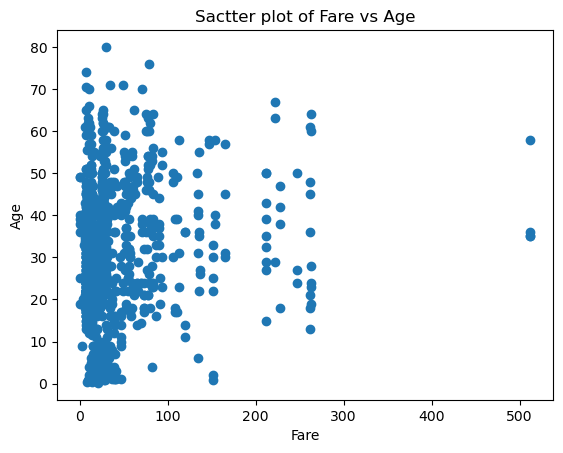

In [17]:
plt.scatter(x=df['Fare'],y=df['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Sactter plot of Fare vs Age')
plt.show()

In [18]:
df['Fare'].corr(df['Age'])   #we can say that there is a relation but not strong

0.1787398559996411

In [19]:
df['Age'].corr(df['Fare'])   #we can say that there is a relation but not strong

0.1787398559996411

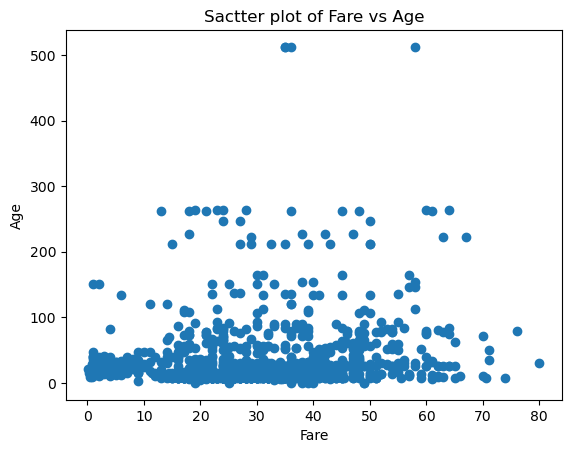

In [20]:
plt.scatter(x=df['Age'],y=df['Fare']) 
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Sactter plot of Fare vs Age')
plt.show()

# 2. Data Preprocessing:

# a. Handle missing values (e.g., imputation)

In [21]:
dftrain.shape  #checking the shape of data

(891, 12)

In [22]:
#handling missing values
#checking the missing values
dftrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [23]:
#checking which imputation technique is best for the data

print("Total missing values in the age columns: ",dftrain['Age'].isnull().sum())
print("Mean age is                            = ",dftrain['Age'].mean())
print("Median age is                          = ",dftrain['Age'].median())
print("Filling the null values of age with mean  ")
print()
dftrain["Age"].fillna(dftrain['Age'].mean(),inplace=True)
print("Total missing values in the age columns :",df['Age'].isnull().sum())

Total missing values in the age columns:  177
Mean age is                            =  29.69911764705882
Median age is                          =  28.0
Filling the null values of age with mean  

Total missing values in the age columns : 263


In [24]:
dftrain['Cabin'].isnull().sum()  #checking null values for cabin column

687

In [25]:
# here we are having a categorical data the imputation technique only used is mode

print("unique values",dftrain['Cabin'].unique())
print()
print("model of the data ",dftrain['Cabin'].mode())
print()

unique values [nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']

model of the data  0        

In [26]:
#from data we can observe that Cabin will de pendending on ticket/Pcalss so we
#will fing the pattern between them because we are getting multimodel data

dftrain['Cabin'].fillna('Unknown', inplace=True)    #craeting a lambda function
                                             #anonumymous function(function without function name)
dftrain.groupby('Ticket')['Cabin'].agg(lambda x: x.mode().iloc[0])  #x.mode()[0] finds the most frequent cabin value in each "Pclass" group
                                              

Ticket
110152             B77
110413             E67
110465             A14
110564             C52
110813             D37
                ...   
W./C. 6608     Unknown
W./C. 6609     Unknown
W.E.P. 5734        E31
W/C 14208      Unknown
WE/P 5735          B22
Name: Cabin, Length: 681, dtype: object

In [27]:
dftrain['Cabin'] = dftrain.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
                                        #applies function to each group
                                        #x.mode()[0]  finds the most frequent cabin value
                                        #fillna(x.mode()[0])replace missing cabin values 

In [28]:
#cross checking whether there are any other missing values in data
dftrain['Cabin'].isnull().sum()

0

In [29]:
dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [30]:
#we can see  Embarked is having only 2 values 
2/836*100
#that is only 0.23 % so we can drop them
dftrain = dftrain.dropna(subset=['Embarked'])  # Removes rows where 'Fare' is NaN

In [31]:
dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
dftest.shape

(418, 11)

In [33]:
#handling missing values for test data
#checking the missing values test data
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [34]:
print("total missing values in the age columns:",dftest['Age'].isnull().sum())
print("mean age is",dftest['Age'].mean())
print("median age is",dftest['Age'].median())
print("filling the null values of age with mean")
print()
dftest["Age"].fillna(dftest['Age'].mean(),inplace=True)
print("total missing values in the age columns:",dftest['Age'].isnull().sum())

total missing values in the age columns: 86
mean age is 30.272590361445783
median age is 27.0
filling the null values of age with mean

total missing values in the age columns: 0


In [35]:
dftest['Cabin'].isnull().sum()

327

In [36]:
# here we are having a categorical data the imputation technique only used is mode

print("unique values",dftest['Cabin'].unique())
print()
print("model of the data ",dftest['Cabin'].mode())
print()

unique values [nan 'B45' 'E31' 'B57 B59 B63 B66' 'B36' 'A21' 'C78' 'D34' 'D19' 'A9'
 'D15' 'C31' 'C23 C25 C27' 'F G63' 'B61' 'C53' 'D43' 'C130' 'C132' 'C101'
 'C55 C57' 'B71' 'C46' 'C116' 'F' 'A29' 'G6' 'C6' 'C28' 'C51' 'E46' 'C54'
 'C97' 'D22' 'B10' 'F4' 'E45' 'E52' 'D30' 'B58 B60' 'E34' 'C62 C64' 'A11'
 'B11' 'C80' 'F33' 'C85' 'D37' 'C86' 'D21' 'C89' 'F E46' 'A34' 'D' 'B26'
 'C22 C26' 'B69' 'C32' 'B78' 'F E57' 'F2' 'A18' 'C106' 'B51 B53 B55'
 'D10 D12' 'E60' 'E50' 'E39 E41' 'B52 B54 B56' 'C39' 'B24' 'D28' 'B41'
 'C7' 'D40' 'D38' 'C105']

model of the data  0    B57 B59 B63 B66
Name: Cabin, dtype: object



In [37]:
#from data we can observe that Cabin will de pendending on ticket/Pcalss so we
#will fing the pattern between them because we are getting multimodel data

dftest['Cabin'].fillna('Unknown', inplace=True)    #craeting a lambda function
                                             #anonumymous function(function without function name)
dftest.groupby('Ticket')['Cabin'].agg(lambda x: x.mode().iloc[0])  #x.mode()[0] finds the most frequent cabin value in each "Pclass" group
                                              

Ticket
110469            C106
110489             D22
110813             D37
111163         Unknown
112051         Unknown
                ...   
W./C. 14260    Unknown
W./C. 14266        F33
W./C. 6607     Unknown
W./C. 6608     Unknown
W.E.P. 5734        E31
Name: Cabin, Length: 363, dtype: object

In [38]:
dftest['Cabin'] = dftest.groupby('Pclass')['Cabin'].transform(lambda x: x.fillna(x.mode()[0]))
                                        #applies function to each group
                                        #x.mode()[0]  finds the most frequent cabin value
                                        #fillna(x.mode()[0])replace missing cabin values 

In [39]:
#cross checking whether there are any other missing values in data
dftrain['Cabin'].isnull().sum()

0

In [40]:
dftrain.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# b. Encode categorical variables.

In [41]:
dftrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [42]:
 #we are performing the label Encoding on the categorical data

from sklearn.preprocessing import LabelEncoder  
label=LabelEncoder()       #storing the function in a instance

lab1=label.fit_transform(dftrain['Embarked'])   #transforming the data
lab1=pd.DataFrame(lab1)                         #Creating the data frame
lab1.columns=["Embarked"]                       #giving the name for the column

#for test data
labt=label.fit_transform(dftest['Embarked'])
labt=pd.DataFrame(labt)
labt.columns=["Embarked"] 

#for train data sex column

lab2=label.fit_transform(dftrain['Sex'])
lab2=pd.DataFrame(lab2)
lab2.columns=['Sex']



#for test data sex column

lab2t=label.fit_transform(dftest['Sex'])
lab2t=pd.DataFrame(lab2t)
lab2t.columns=['Sex']


In [43]:
labeltrain=pd.concat([lab1,lab2],axis=1)
labeltrain

,Embarked,Sex
0,2,1
1,0,0
2,2,0
3,2,0
4,2,1
...,...,...
884,2,1
885,2,0
886,2,0
887,0,1


In [44]:
labeltest=pd.concat([labt,lab2t],axis=1)
labeltest

,Embarked,Sex
0,1,1
1,2,0
2,1,1
3,2,1
4,2,0
...,...,...
413,2,1
414,0,0
415,2,1
416,2,1


In [45]:
dftrain['SibSp'].value_counts()  # this columns is having only 7 values like label encoded

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [46]:
dftrain['Parch'].value_counts()  # this columns is having only 7 values like label encoded

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [47]:
dftrain['Pclass'].value_counts()  # this columns is having only 3 values like label encoded

3    491
1    214
2    184
Name: Pclass, dtype: int64

In [48]:
#Colums to be Standardize or Normalize

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scale=scaler.fit_transform(dftrain[['Age','Fare']])
scale=pd.DataFrame(scale)
scale.columns=['Age','Fare']


#for test data 

scaler=MinMaxScaler()

scalet=scaler.fit_transform(dftest[['Age','Fare']])
scalet=pd.DataFrame(scalet)
scalet.columns=['Age','Fare']

scale

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713
...,...,...
884,0.334004,0.025374
885,0.233476,0.058556
886,0.367921,0.045771
887,0.321438,0.058556


In [49]:
#merging the all transformed columns in a single dataset

#train

df3=dftrain[['SibSp','Parch','Pclass','Survived']]

df_train=pd.concat([scale,labeltrain,df3],axis=1)

df_train.dropna(inplace=True)  #checks for any null values and drop them
df_train.isnull().sum()

df_train

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...
884,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0
885,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0
886,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0
887,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0


In [50]:
#merging all  the test dataset after data transformation

df2=dftest[['SibSp','Pclass','Parch']]

df_test=pd.concat([scalet,labeltest,df2],axis=1,ignore_index=True)

df_test.columns=['Age','Fare','Embarked','Sex','SibSp','Parch','Pclass']

df_test

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass
0,0.452723,0.015282,1,1,0,3,0
1,0.617566,0.013663,2,0,1,3,0
2,0.815377,0.018909,1,1,0,2,0
3,0.353818,0.016908,2,1,0,3,0
4,0.287881,0.023984,2,0,1,3,1
...,...,...,...,...,...,...,...
413,0.396975,0.015713,2,1,0,3,0
414,0.512066,0.212559,0,0,0,1,0
415,0.505473,0.014151,2,1,0,3,0
416,0.396975,0.015713,2,1,0,3,0


In [51]:
df_test.isna().sum()

Age         0
Fare        1
Embarked    0
Sex         0
SibSp       0
Parch       0
Pclass      0
dtype: int64

In [52]:
df_test.dropna(inplace=True)

# 3. Model Building:

a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).

b. Train the model using the training data.

In [53]:
#in this problem the data is already partation into train and test so we
#are not splitting the data into train and test and we are fiiting the 
#model on train data and test on test data

x=df_train.iloc[:,:7]  #independent variables using only pandas iloc func
y=df_train['Survived']  #Dependent variable



In [54]:
from sklearn.linear_model import LogisticRegression  #import the model 

model=LogisticRegression()     #creating a instance

log=model.fit(x,y)             #fitting the model

y_pred=model.predict(x)        #predicting on x data



y_pred_train=pd.DataFrame(y_pred,columns=['y_pred'])  #craeting a dataframe



In [55]:
df_train.reset_index(drop=True, inplace=True)      #resetting the index because it may gets suffed
y_pred_train.reset_index(drop=True, inplace=True)
df_train1= pd.concat([df_train, y_pred_train], axis=1)  #concating both pred and train data to see difference
df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [56]:
prob=model.predict_proba(x)

prob=prob.ravel()
prob

array([0.784895  , 0.215105  , 0.38921681, ..., 0.61973448, 0.66155553,
       0.33844447])

In [57]:
#creating a column in table to see the predicted probability 


df_train1['predicted_prob']=pd.DataFrame(prob)

df_train1

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784895
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215105
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389217
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610783
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750091
...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770123
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229877
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586431
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413569


In [58]:
x2=df_test.iloc[:,:]            #for total test dataset
y_test_pred=model.predict(x2)   #predicting on x data

y_test_pred=pd.DataFrame(y_test_pred,columns=['y_test_pred'])   #creating a dataframe

y_test_pred.value_counts()

y_test_pred
1.0            401
0.0             16
dtype: int64

# cross validation

In [59]:
#apply the cross validation using kfold

from sklearn.model_selection import cross_val_score,KFold

model=LogisticRegression()

kfold=KFold(n_splits=5,shuffle=True,random_state=37)  #splits the hole datset into 5 parts

scores=cross_val_score(model,x,y,cv=kfold,scoring='accuracy')

print("cross-validation-score:",scores)
print("mean accuracy        :",scores.mean()*100)

cross-validation-score: [0.65168539 0.71348315 0.74011299 0.6779661  0.65536723]
mean accuracy        : 68.77229734018917


In [60]:
#it will repeat more/multiple times for more stable evaluation

from sklearn.model_selection import RepeatedKFold

# Perform Repeated K-Fold Cross-Validation (e.g., 5 folds, repeated 3 times)
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=37)
scores = cross_val_score(model, x, y, cv=rkf, scoring='accuracy')

print("Repeated K-Fold CV Scores:", scores)
print()
print("Mean Accuracy:", scores.mean()*100)

Repeated K-Fold CV Scores: [0.65168539 0.71348315 0.74011299 0.6779661  0.65536723 0.69662921
 0.65730337 0.74011299 0.69491525 0.65536723 0.64044944 0.69662921
 0.62711864 0.75141243 0.71186441]

Mean Accuracy: 68.73611375610994


In [61]:
#{"suffile splitscross validation"} randomly splits the data into train/test
#multiple times without fixed folds it is also knows as monte carlo cv


from sklearn.model_selection import ShuffleSplit

suffle=ShuffleSplit(n_splits=10,test_size=0.20,random_state=37)
scores=cross_val_score(model,x,y,cv=suffle,scoring='accuracy')

print("shuffle split cv score",scores)
print()
print("mean accuracy",scores.mean())

shuffle split cv score [0.65168539 0.69662921 0.64044944 0.73033708 0.67977528 0.66853933
 0.69101124 0.68539326 0.70786517 0.65168539]

mean accuracy 0.6803370786516854


# 4. Model Evaluation:

a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
Visualize the ROC curve.

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix


accuracy = accuracy_score(y, y_pred_train)
precision = precision_score(y, y_pred_train)
recall = recall_score(y, y_pred_train)
f1 = f1_score(y, y_pred_train)


# Display results
print(f"Accuracy  : {accuracy:.2f}")
print(f"Precision : {precision:.2f}")
print(f"Recall    : {recall:.2f}")
print(f"F1 Score  : {f1:.2f}")
print()
print("\nConfusion Matrix:")
print(confusion_matrix(y, y_pred_train))


Accuracy  : 0.69
Precision : 0.63
Recall    : 0.44
F1 Score  : 0.52


Confusion Matrix:
[[459  89]
 [189 150]]


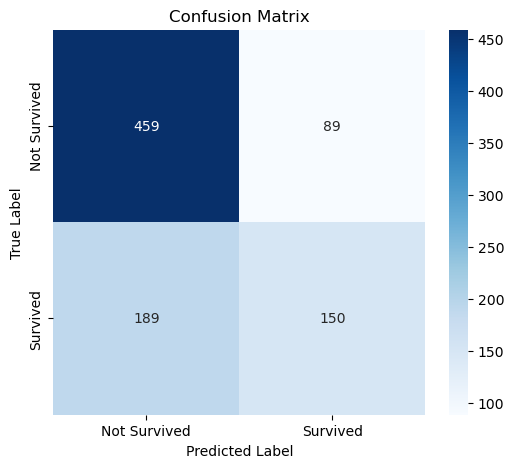

In [63]:
#visualization for confusion matrix


# Compute confusion matrix
cm = confusion_matrix(y, y_pred_train)

# Define class labels
labels = ['Not Survived', 'Survived']

# Create heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# Add labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [64]:
#calculating with help of formula

TP=150
TN=459
FP=89
FN=189

print("Recall     :",150/(150+189))  #TP/TP+FN  RECALL/SENSITIVITY  true postive rate
print()

#calculating with help of formula

print("Specificity:",459/(459+189)) #TN/TN+FP Specificity true negative rate
print()


print("Precision  :",150/(150+89))  #TP/TP+FP  precision
print()

print("T-1 Erroe  fpr:",89/(89+459))  #type 1 error  FP/FP+TN  false postive rate 
print()

print("T-2 error fnr :",189/(189+150))  #TYPE 2 ERROR FN/FN+TN    True negative rate
print()


precision=TP/(TP+FP)
recall=TP/(TP+FN)              #calculates the harmonic mean of precision and recall
print("f1-score",2*(precision*recall)/(precision+recall))
print()

print("Accuracy score:",(150+459)/(459+89+189+150))  #ACCURACY TP+TN/TOTAL

Recall     : 0.4424778761061947

Specificity: 0.7083333333333334

Precision  : 0.6276150627615062

T-1 Erroe  fpr: 0.1624087591240876

T-2 error fnr : 0.5575221238938053

f1-score 0.5190311418685121

Accuracy score: 0.6865839909808342


false positive rate      : [0.         0.16240876 1.        ]
true positive rate       : [0.         0.44247788 1.        ]
decision threshold values: [inf  1.  0.]


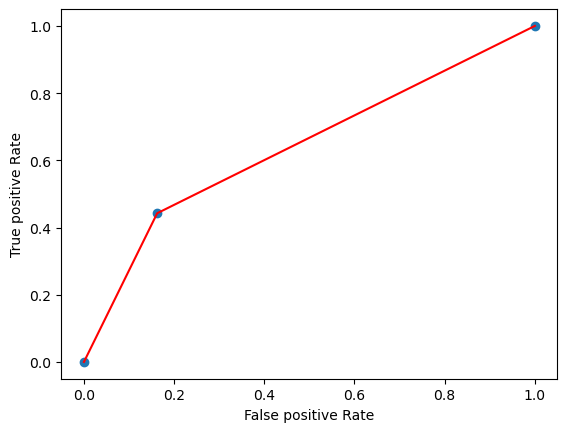

area  under curve 64.003


In [65]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy=roc_curve(y,df_train1['y_pred'])

print("false positive rate      :",fpr)  #type 1 error

print("true positive rate       :",tpr)   #recall

print("decision threshold values:",dummy)


plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='red')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc=roc_auc_score(y,df_train1['y_pred'])
print("area  under curve",(auc*100).round(3))

In [66]:
#from the above graph we can see that only there are only three points because
#in the dependent varaible/target variable we are having only the binary class
#so we have get only three values instead of many points.If we want to see more
#points we can use the predicted probality values and then plot

false positive rate      : [0.         0.16240876 1.        ]
true positive rate       : [0.         0.44247788 1.        ]
decision threshold values: [inf  1.  0.]


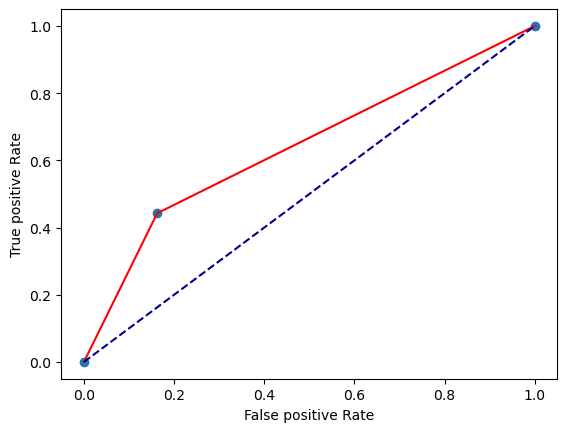

area  under curve 64.003


In [67]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr,tpr,dummy=roc_curve(y,df_train1['y_pred'])

print("false positive rate      :",fpr)  #type 1 error

print("true positive rate       :",tpr)   #recall

print("decision threshold values:",dummy)


plt.scatter(x=fpr,y=tpr)
plt.plot(fpr, tpr, color='red', label=f"AUC={(roc_auc_score(y, df_train1['y_pred']) * 100).round(3)}")  

plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.ylabel("True positive Rate")
plt.xlabel("False positive Rate")
plt.show()

auc=roc_auc_score(y,df_train1['y_pred'])
print("area  under curve",(auc*100).round(3))

In [68]:
#calculating the log loss:-metrics used to calculate performance of classification
#model it is calculated by apply formula logloss/in simple terms it is error

from sklearn.metrics import log_loss
loss = log_loss(y,y_pred)
print("loss :", np.round(loss,3))



loss : 11.297


In [69]:
#from above result we can say the model is not performing well.So we can say
#that the models predicted probability are significantly different from actual 
#labels

In [70]:
df_train1


,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784895
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215105
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389217
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610783
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750091
...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770123
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229877
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586431
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413569


In [71]:
#for which threshold value model is perfroming well

results=[]
thresholds=np.arange(0.3,0.7,0.01)

for threshold in thresholds:
    y_pred1=(df_train1['predicted_prob']>threshold).astype(int)
    accuracy=accuracy_score(y,y_pred1)
    results.append([threshold,accuracy])
    
results 
#from the below results we can see if we change the threshold value/cutoff 
#value we can a slight improvement in the model so we select one threshold value


[[0.3, 0.4813979706877114],
 [0.31, 0.4813979706877114],
 [0.32, 0.48252536640360766],
 [0.33, 0.4836527621195039],
 [0.34, 0.4836527621195039],
 [0.35000000000000003, 0.48478015783540024],
 [0.36000000000000004, 0.48478015783540024],
 [0.37000000000000005, 0.4836527621195039],
 [0.38000000000000006, 0.4813979706877114],
 [0.39000000000000007, 0.48703494926719276],
 [0.4000000000000001, 0.4926719278466742],
 [0.4100000000000001, 0.4926719278466742],
 [0.4200000000000001, 0.4983089064261556],
 [0.4300000000000001, 0.5016910935738444],
 [0.4400000000000001, 0.5084554678692221],
 [0.4500000000000001, 0.5107102593010147],
 [0.46000000000000013, 0.5118376550169109],
 [0.47000000000000014, 0.5140924464487034],
 [0.48000000000000015, 0.5140924464487034],
 [0.49000000000000016, 0.5163472378804961],
 [0.5000000000000002, 0.5163472378804961],
 [0.5100000000000002, 0.5163472378804961],
 [0.5200000000000002, 0.5186020293122886],
 [0.5300000000000002, 0.5186020293122886],
 [0.5400000000000003, 0.51

In [72]:
#from above results we can see 4.6 is having maximum accuracy

dft=pd.DataFrame(df_train1['predicted_prob']>0.46)


In [73]:
dft.value_counts(df_train1['predicted_prob']>0.46)  #checking using function

predicted_prob
True     456
False    431
dtype: int64

In [74]:
y_pred1=[]                        #creating a array and storing the results
for i in dft['predicted_prob']:
    if i>0.4:
        y_pred1.append(1)
    else:
        y_pred1.append(0)
        
y_pred1=pd.DataFrame(y_pred1,columns=['y_pred1'])
y_pred1                                         #creating a data frame 

,y_pred1
0,1
1,0
2,0
3,1
4,1
...,...
882,1
883,0
884,1
885,0


In [75]:
df_train2=pd.concat([df_train1,y_pred1],axis=1)  #concatinating the results

df_train2

,Age,Fare,Embarked,Sex,SibSp,Parch,Pclass,Survived,y_pred,predicted_prob,y_pred1
0,0.271174,0.014151,2.0,1.0,1.0,0.0,3.0,0.0,0.0,0.784895,1
1,0.472229,0.139136,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.215105,0
2,0.321438,0.015469,2.0,0.0,0.0,0.0,3.0,1.0,0.0,0.389217,0
3,0.434531,0.103644,2.0,0.0,1.0,0.0,1.0,1.0,1.0,0.610783,1
4,0.434531,0.015713,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.750091,1
...,...,...,...,...,...,...,...,...,...,...,...
882,0.334004,0.025374,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.770123,1
883,0.233476,0.058556,2.0,0.0,0.0,5.0,3.0,0.0,1.0,0.229877,0
884,0.367921,0.045771,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.586431,1
885,0.321438,0.058556,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.413569,0


In [76]:
accuracy_score(y,y_pred1)   # checking accuracy 

0.5118376550169109

In [77]:
#y_prob=pd.DataFrame(df_train1['predicted_prob'])  no need if we get error we can use thsi

area under curve: 53.78716921818143


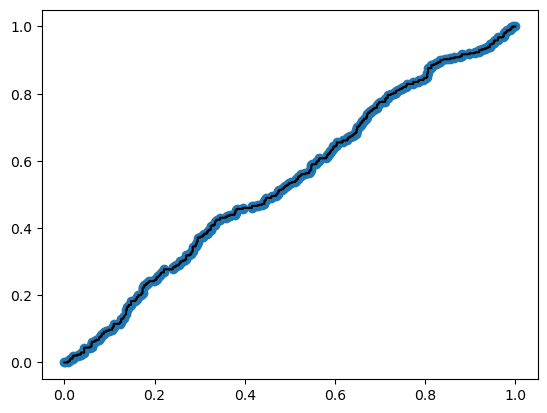

In [78]:
#creating a roc_auc curve with the predicted probability values 

fpr,tpr,dummy=roc_curve(y,df_train1['predicted_prob'])

plt.scatter(x=fpr,y=tpr)
plt.plot(fpr,tpr,color='black',label='"Roc_Curve"')

auc_score=roc_auc_score(y,df_train1['predicted_prob'])
print("area under curve:",auc_score*100)

In [79]:
#we can see the values are increased from 3.and the area under the curve is
#also increased 

# 5. Interpretation:

a. Interpret the coefficients of the logistic regression model.

b. Discuss the significance of features in predicting the target variable (survival probability in this case).

# a. Interpret the coefficients of the logistic regression model.

In [80]:
model = LogisticRegression()
model.fit(x,y)  #the model is trained
print(model.coef_)  
model.coef_[0]

[[ 0.04363973 -0.26100187 -0.0089211  -0.08505572 -0.1084207   0.30501981
  -0.83298923]]


array([ 0.04363973, -0.26100187, -0.0089211 , -0.08505572, -0.1084207 ,
        0.30501981, -0.83298923])

In [81]:
df_train1.columns

Index(['Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch', 'Pclass',
       'Survived', 'y_pred', 'predicted_prob'],
      dtype='object')

In [82]:
df_train1.columns

Index(['Age', 'Fare', 'Embarked', 'Sex', 'SibSp', 'Parch', 'Pclass',
       'Survived', 'y_pred', 'predicted_prob'],
      dtype='object')

# b. Discuss the significance of features in predicting the target variable (survival probability in this case).

In [83]:
import statsmodels.api as sm

X = df_train1.drop(columns=['Survived'])  # Independent variables
y = df_train1['Survived']  # Dependent variable

#X = sm.add_constant(X)  # Adding intercept so that model has a bias term
                       #the intercept ensures that B0 is present in equation
         
logit_model = sm.Logit(y, X) #fits a logisticregression model using statsmodel
                             #it uses logit function/formla for calculation

result = logit_model.fit()  #fits the model to data using MLE(maximum 
                                        #likehood estimator)


print(result.summary())  # View p-values and significance of each feature

Optimization terminated successfully.
         Current function value: 0.604566
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  887
Model:                          Logit   Df Residuals:                      878
Method:                           MLE   Df Model:                            8
Date:                Wed, 07 May 2025   Pseudo R-squ.:                 0.09105
Time:                        19:10:31   Log-Likelihood:                -536.25
converged:                       True   LL-Null:                       -589.97
Covariance Type:            nonrobust   LLR p-value:                 1.283e-19
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Age                0.2812      0.444      0.634      0.526      -0.589       1.151
Fare             

In [84]:
result.predict(X)

0      0.276675
1      0.531890
2      0.240184
3      0.634228
4      0.299638
         ...   
882    0.296855
883    0.598934
884    0.395810
885    0.582240
886    0.381679
Length: 887, dtype: float64

# Interview Questions
